In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = os.listdir(r'/Users/xiao/Downloads/data project/Youtube_project_shan_singh_Udemy/additional_data')
files_csv = [file for file in files if '.csv' in file]


In [3]:
full_df = pd.DataFrame()
path = r'/Users/xiao/Downloads/data project/Youtube_project_shan_singh_Udemy/additional_data'

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding = 'iso-8859-1')
    full_df = pd.concat([full_df, current_df])

In [4]:
full_df = full_df.drop_duplicates()

In [6]:
full_df.to_csv(r'/Users/xiao/Downloads/data project/Youtube_project_shan_singh_Udemy/youtube_extra.csv')

In [22]:
json_df = pd.read_json( r'/Users/xiao/Downloads/data project/Youtube_project_shan_singh_Udemy/additional_data/US_category_id.json')
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [25]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


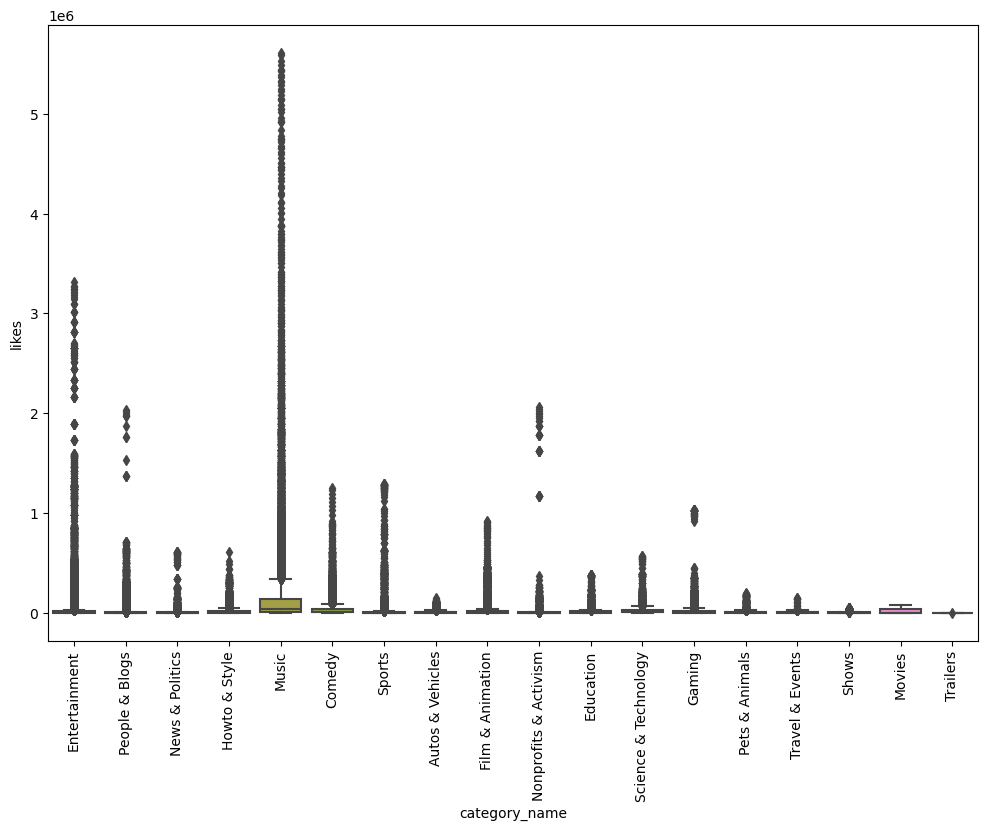

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df )
plt.xticks(rotation =90)
plt.show()

<Axes: xlabel='views', ylabel='likes'>

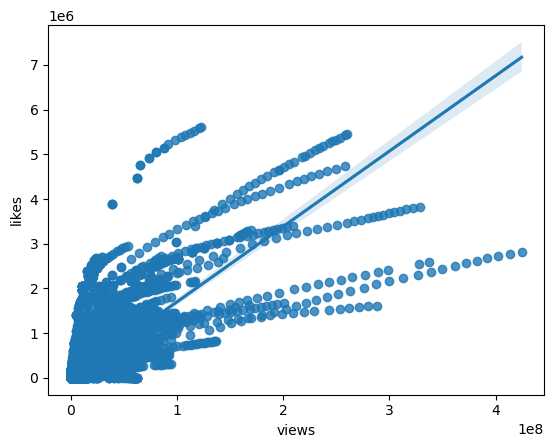

In [32]:
sns.regplot(x='views', y='likes', data=full_df)

In [37]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

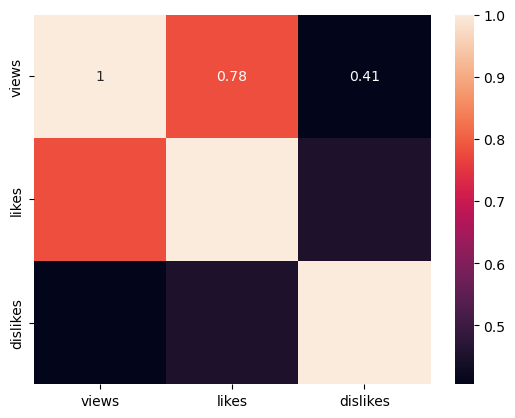

In [36]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

In [59]:
cdf = full_df['channel_title'].value_counts().reset_index()

In [65]:
import plotly.express as px
px.bar(data_frame=cdf[0:20], x='channel_title', y='count',title='total_videos by channle', labels={'count':'total_videos'} )


In [66]:
import string

In [70]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])
full_df['punctuation_count'] = full_df['title'].apply(punc_count)

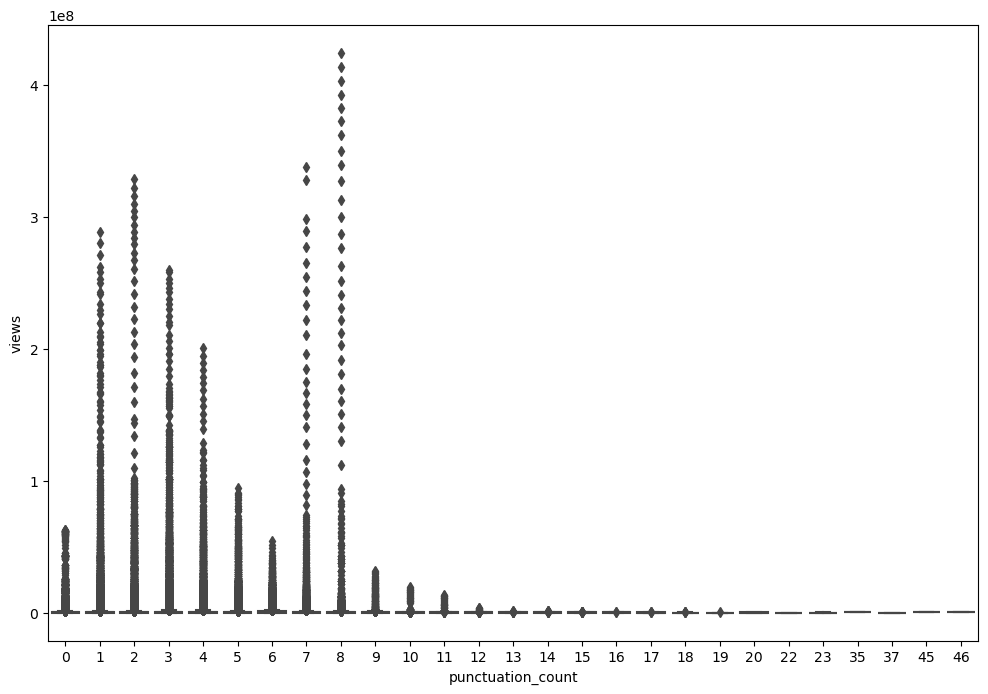

In [74]:
plt.figure(figsize=(12,8))
sns.boxplot(x='punctuation_count', y='views', data=full_df)
plt.show()

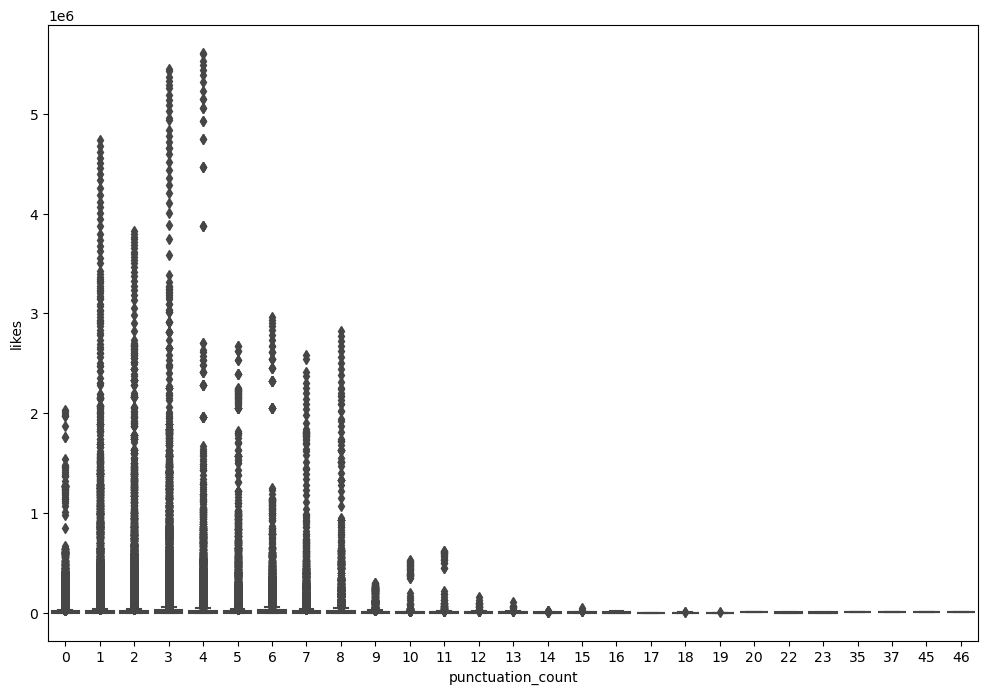

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(x='punctuation_count', y='likes', data=full_df)
plt.show()

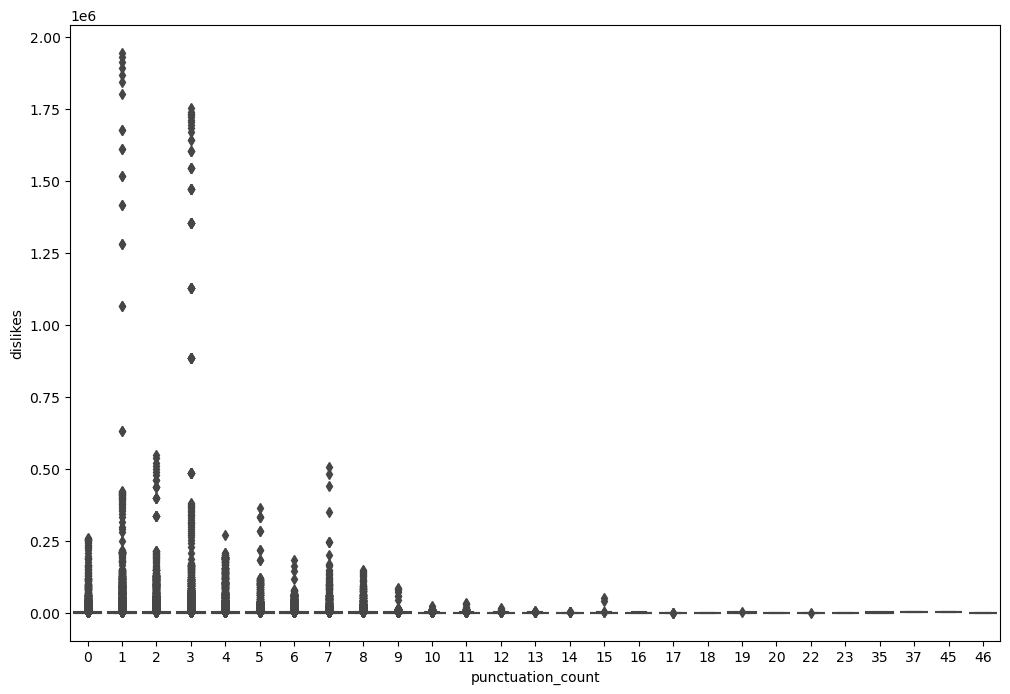

In [76]:
plt.figure(figsize=(12,8))
sns.boxplot(x='punctuation_count', y='dislikes', data=full_df)
plt.show()